<a href="https://colab.research.google.com/github/ira89l/Home-tasks-/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [77]:
!pip install mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [78]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [80]:
con = mysql.connector.connect(user='user1',
                              password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [82]:
cursor = con.cursor()

cursor.execute("""
    SELECT MAX(hire_date) AS max_hire_date, MIN(hire_date) AS min_hire_date
    FROM employees;
""")

result = cursor.fetchall()
print(result)

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]


Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [83]:
import pandas as pd


# cursor.execute("SHOW TABLES")
# tables = cursor.fetchall()


# print("Tables in the database:")
# for table in tables:
#     print(table[0])

# cursor.execute("DESCRIBE salaries")
# for column in cursor.fetchall():
#     print(column)


cursor.execute("""
    SELECT s.emp_no AS employee_id, s.salary, s.from_date, s.to_date
    FROM salaries s
    INNER JOIN (
        SELECT emp_no, MAX(to_date) AS last_to_date
        FROM salaries
        GROUP BY emp_no
    ) AS latest ON s.emp_no = latest.emp_no
                 AND s.to_date = latest.last_to_date
""")


columns = [description[0] for description in cursor.description]
res = pd.DataFrame(cursor.fetchall(), columns=columns)


print("Назви колонок:", res.columns.tolist())
print("Розмір DataFrame:", res.shape)
res.head(3)

Назви колонок: ['employee_id', 'salary', 'from_date', 'to_date']
Розмір DataFrame: (300180, 4)


,employee_id,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [ ]:
field_names = [i[0] for i in cursor.description]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [84]:
import pandas as pd

cursor = con.cursor()

cursor.execute("DESCRIBE salaries")
table_description = cursor.fetchall()


for column in table_description:
    print(column)


cursor.execute("""
    SELECT s.emp_no AS employee_id, s.salary, s.from_date, s.to_date
    FROM salaries s
    INNER JOIN (
        SELECT emp_no, MAX(to_date) AS last_to_date
        FROM salaries
        GROUP BY emp_no
    ) AS latest ON s.emp_no = latest.emp_no
                 AND s.to_date = latest.last_to_date
""")


columns = [description[0] for description in cursor.description]
res = pd.DataFrame(cursor.fetchall(), columns=columns)
res['to_date'] = res['to_date'].astype(str)
count_to_date_9999 = (res['to_date'] == '9999-01-01').sum()
count_to_date_not_9999 = (res['to_date'] != '9999-01-01').sum()


print("Кількість значень to_date, що дорівнюють 9999-01-01:", count_to_date_9999)
print("Кількість значень to_date, що не дорівнюють 9999-01-01:", count_to_date_not_9999)

('emp_no', 'int', 'NO', 'PRI', None, '')
('salary', 'int', 'NO', '', None, '')
('from_date', 'date', 'NO', 'PRI', None, '')
('to_date', 'date', 'NO', '', None, '')
Кількість значень to_date, що дорівнюють 9999-01-01: 240124
Кількість значень to_date, що не дорівнюють 9999-01-01: 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

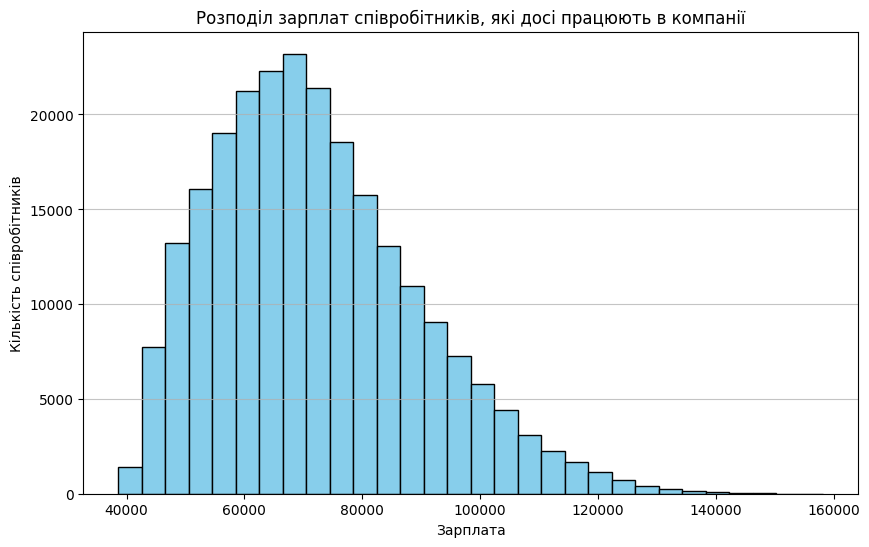

In [93]:
import matplotlib.pyplot as plt


active_employees_salaries = res[pd.isna(res['to_date'])]['salary']


plt.figure(figsize=(10, 6))
plt.hist(active_employees_salaries, bins=30, color='skyblue', edgecolor='black')
plt.title('Розподіл зарплат співробітників, які досі працюють в компанії')
plt.xlabel('Зарплата')
plt.ylabel('Кількість співробітників')
plt.grid(axis='y', alpha=0.75)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [94]:
con.close()